In [7]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
import random

class RLAgent():
    def __init__(self, epsilon=1.0, alpha=0.5, gamma=0.9, num_episodes_to_train=30000):

        self.valid_actions = list(range(2))

        self.Q = dict()          
        self.epsilon = epsilon   
        self.alpha = alpha      
        self.gamma = gamma      
        
        self.num_episodes_to_train = num_episodes_to_train
        self.small_decrement = (0.1 * epsilon) / (0.3 * num_episodes_to_train) 
        self.big_decrement = (0.8 * epsilon) / (0.4 * num_episodes_to_train)
        
        self.num_episodes_to_train_left = num_episodes_to_train

    def update_parameters(self):

        if self.num_episodes_to_train_left > 0.7 * self.num_episodes_to_train:
            self.epsilon -= self.small_decrement
        elif self.num_episodes_to_train_left > 0.3 * self.num_episodes_to_train:
            self.epsilon -= self.big_decrement
        elif self.num_episodes_to_train_left > 0:
            self.epsilon -= self.small_decrement
        else:
            self.epsilon = 0.0
            self.alpha = 0.0

        self.num_episodes_to_train_left -= 1

    def create_Q_if_new_observation(self, observation):

        if observation not in self.Q:
            self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)

    def get_maxQ(self, observation):

        self.create_Q_if_new_observation(observation)
        return max(self.Q[observation].values())

    def choose_action(self, observation):

        self.create_Q_if_new_observation(observation)

        if random.random() > self.epsilon:
            maxQ = self.get_maxQ(observation)
            action = random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)

        self.update_parameters()

        return action


    def learn(self, observation, action, reward, next_observation):
        
#        print('{},{},{},{}'.format(observation, action, reward, next_observation))

        self.Q[observation][action] += self.alpha * (reward
                                                     + (self.gamma * self.get_maxQ(next_observation))
                                                     - self.Q[observation][action])
    
    

In [523]:
def get_state_from_observation(rows):
#    print(row)
#    print(rows[1]['timestamp'])
#    print(rows[1]['ticker'])
#    print(rows[1]['product'])
#    print(rows[1]['neg'])
#    print(rows[1]['neu'])
#    print(rows[1]['pos'])
#    print(rows[1]['compound'])
    #    print(observation)
    str_ = '({},{})'.format(int (rows['compound']/0.1), int (int(rows['stk_price'])/10.0))
#    print(str_)
    return str_

In [326]:
import time
import datetime
s = "2013-01-08"
time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())


1357621200.0

In [327]:
df = pd.read_csv('data.csv')

In [328]:
aapl = pd.read_csv('dataset/AAPL_1.csv')
goog = pd.read_csv('dataset/GOOG.csv')
hpe = pd.read_csv('dataset/HPE.csv')
msft = pd.read_csv('dataset/MSFT.csv')
csco = pd.read_csv('dataset/CSCO.csv')

In [469]:
#temp_df = pd.read_csv('dataset/data_test.csv')
temp_df = pd.read_csv('dataset/data_1.csv')
temp_df = temp_df.dropna(axis=0,subset=['stk_price'])
df = temp_df
df = df.sort_values(by=['timestamp'])  

In [470]:
df.head()

created_at     timestamp ticker  product  neg    neu    pos  compound  \
3831  2013-01-02  1.357085e+09   AAPL  iphone8  0.0  1.000  0.000    0.0000   
1265  2013-01-02  1.357085e+09   AAPL  iphone6  0.0  1.000  0.000    0.0000   
2531  2013-01-02  1.357085e+09   AAPL  iphone7  0.0  1.000  0.000    0.0000   
9152  2013-01-02  1.357085e+09   GOOG   Pixel3  0.0  1.000  0.000    0.0000   
5791  2013-01-02  1.357085e+09   AAPL  ipadpro  0.0  0.878  0.122    0.4939   

       stk_price  
3831   78.432854  
1265   78.432854  
2531   78.432854  
9152  359.288177  
5791   78.432854

In [471]:
df.shape

(5981, 9)

In [472]:
df = df.drop(columns=['created_at'])

In [473]:
df.head()

timestamp ticker  product  neg    neu    pos  compound   stk_price
3831  1.357085e+09   AAPL  iphone8  0.0  1.000  0.000    0.0000   78.432854
1265  1.357085e+09   AAPL  iphone6  0.0  1.000  0.000    0.0000   78.432854
2531  1.357085e+09   AAPL  iphone7  0.0  1.000  0.000    0.0000   78.432854
9152  1.357085e+09   GOOG   Pixel3  0.0  1.000  0.000    0.0000  359.288177
5791  1.357085e+09   AAPL  ipadpro  0.0  0.878  0.122    0.4939   78.432854

In [474]:
df['product'].unique().tolist()

['iphone8',
 'iphone6',
 'iphone7',
 'Pixel3',
 'ipadpro',
 'nexus5',
 'MacBookPro',
 'hplaptop',
 'surfacepro',
 'MacBookAir',
 'Pixel2',
 'ciscorouter']

In [524]:
product_list = ['iphone6', 'iphone7', 'iphone8', 'ipadpro',
 'MacBookPro', 'MacBookAir', 'Pixel3', 'Pixel2',
 'nexus5', 'hplaptop', 'surfacepro', 'ciscorouter']
print(product_list)

['iphone6', 'iphone7', 'iphone8', 'ipadpro', 'MacBookPro', 'MacBookAir', 'Pixel3', 'Pixel2', 'nexus5', 'hplaptop', 'surfacepro', 'ciscorouter']


In [525]:
prod_frame = dict()
for i in product_list:
    temp = (df.loc[df['product'] == i])
    df.sort_values(by=['timestamp']) 
    prod_frame[i] = temp.sort_values(by=['timestamp']) 
print(prod_frame.__len__())

12


In [526]:
for i in prod_frame.keys():
    print(i,' = ',prod_frame[i].shape)
    print(prod_frame[i].head())

iphone6  =  (873, 8)
         timestamp ticker  product    neg    neu    pos  compound  stk_price
1265  1.357085e+09   AAPL  iphone6  0.000  1.000  0.000    0.0000  78.432854
1264  1.357171e+09   AAPL  iphone6  0.198  0.802  0.000   -0.4968  77.442856
1263  1.357258e+09   AAPL  iphone6  0.000  1.000  0.000    0.0000  75.285713
1260  1.357517e+09   AAPL  iphone6  0.000  0.637  0.363    0.8126  74.842857
1259  1.357603e+09   AAPL  iphone6  0.000  0.581  0.419    0.8442  75.044289
iphone7  =  (873, 8)
         timestamp ticker  product  neg    neu    pos  compound  stk_price
2531  1.357085e+09   AAPL  iphone7  0.0  1.000  0.000    0.0000  78.432854
2530  1.357171e+09   AAPL  iphone7  0.0  1.000  0.000    0.0000  77.442856
2529  1.357258e+09   AAPL  iphone7  0.0  1.000  0.000    0.0000  75.285713
2526  1.357517e+09   AAPL  iphone7  0.0  1.000  0.000    0.0000  74.842857
2525  1.357603e+09   AAPL  iphone7  0.0  0.827  0.173    0.6588  75.044289
iphone8  =  (873, 8)
         timestamp ticker

In [527]:
print(df.columns.values)

['timestamp' 'ticker' 'product' 'neg' 'neu' 'pos' 'compound' 'stk_price']


In [528]:
agent = RLAgent(epsilon=0.3, alpha=0.1, gamma=0.2)

In [529]:
def step(cur_row, nxt_row, action):
    if action:  # hit: add a card to players hand and return
        if nxt_row['compound'] < 0:
            reward = -10
        elif nxt_row['compound'] - 0.5 > cur_row['compound']:
            reward = 5
        elif nxt_row['compound'] > cur_row['compound']:
            reward = 10
        else:
            reward = 0
    else:  # stick: play out the dealers hand, and score
        if nxt_row['compound'] < 0:
            reward = 10
        elif nxt_row['compound'] - 0.5 > cur_row['compound']:
            reward = -5
        elif nxt_row['compound'] > cur_row['compound']:
            reward = -10
        else:
            reward = 0
    return reward

In [530]:
def train(product_name, prod_frame, agent):
    cur_obs = ''
    nxt_obs = ''
    cur_row = next(prod_frame.iterrows())[1]
    nxt_row = next(prod_frame.iterrows())[1]
    for index, row in prod_frame.iterrows():
        # first time
        if cur_obs == '':
            cur_obs = get_state_from_observation(row)
            cur_row = row
            nxt_obs = cur_obs
            nxt_row = row
            continue
        else:
#            print('ruhani')
            nxt_obs = get_state_from_observation(row)            
            nxt_row = row

#        print('Cur Obs: {}, Nxt Obs: {}'.format(cur_obs, nxt_obs))
        action = agent.choose_action(cur_obs)
#        print(action)
        # reward_calculation
#        print('Sentiment Score {} to {}'.format(cur_row['compound'], nxt_row['compound']))
        reward = step(cur_row, nxt_row, action)
        agent.learn(cur_obs, action, reward, nxt_obs)
        
        cur_obs = nxt_obs
        cur_row = nxt_row

In [531]:
learning_list = dict()
for i in product_list:
    print(i)
    agent = agent = RLAgent(epsilon=0.3, alpha=0.1, gamma=0.2)
    train(i,prod_frame[i],agent)
    learning_list[i] = agent.Q
    print('Q List:',agent.Q.__len__())

iphone6
Q List: 99
iphone7
Q List: 96
iphone8
Q List: 96
ipadpro
Q List: 93
MacBookPro
Q List: 70
MacBookAir
Q List: 23
Pixel3
Q List: 147
Pixel2
Q List: 48
nexus5
Q List: 131
hplaptop
Q List: 25
surfacepro
Q List: 15
ciscorouter
Q List: 6


In [533]:
for keys in learning_list.keys():
    print(keys)
    for values in learning_list[keys].keys():
        print(values, learning_list[keys][values])
    print()
    print()

iphone6
(0,7) {0: -0.07846353971412484, 1: -1.7041154199624557}
(-4,7) {0: -1.39993248, 1: 3.3710526869223347}
(8,7) {0: 0.0, 1: 0.7994307292057174}
(0,6) {0: -1.6063864757556425, 1: 2.5203755302418025}
(4,7) {0: -0.020000000000000004, 1: 0.017114435681905935}
(7,7) {0: 0.0, 1: 0.0}
(6,7) {0: 0.08291325036693802, 1: -0.892964239518094}
(7,6) {0: -0.9651069857872097, 1: 0.03410273884389293}
(5,6) {0: -0.986204360905751, 1: 0.18538312489144126}
(-3,6) {0: -0.3309052024175798, 1: 0.0}
(-4,6) {0: -1.0653687506521425, 1: -0.32798823606943783}
(-2,6) {0: 1.0, 1: -0.9800000000000001}
(-1,6) {0: -1.0, 1: 1.0199190992908098}
(3,6) {0: -0.9820508825896225, 1: -1.0}
(-6,6) {0: 0.0, 1: 0.5}
(4,6) {0: -0.270389306089754, 1: 1.0006824505095475}
(6,6) {0: -0.769375454648345, 1: 0.05418024011149653}
(-7,6) {0: 0.9979971967232001, 1: 0.0}
(0,5) {0: 1.0059317337088, 1: -0.30985828904468804}
(4,5) {0: 0.010000000000000002, 1: 0.0}
(-5,6) {0: 0.0, 1: 0.9919346771711706}
(1,6) {0: 0.0, 1: 0.005856674031064

(3,60) {0: -1.0, 1: 0.0}
(4,61) {0: 0.022535223039999996, 1: 0.0}
(4,64) {0: 0.0, 1: 0.00081662012928}
(7,65) {0: 0.0, 1: 0.032580000000000005}
(5,65) {0: 0.0, 1: 0.0}
(5,64) {0: 0.0, 1: 0.0}
(0,70) {0: -0.38031924602293504, 1: 3.2752238246165346}
(4,71) {0: 0.020000000000000004, 1: 0.03403278157477616}
(3,71) {0: 0.0030586895454528004, 1: 0.0}
(0,71) {0: -1.4028695345296, 1: 2.32855873705287}
(0,72) {0: -2.9886, 1: 1.0777494898962525}
(1,72) {0: 0.0, 1: 0.0}
(0,73) {0: -0.426701333293184, 1: 3.1062697779553403}
(5,72) {0: 0.0, 1: -1.0}
(-6,73) {0: -0.5, 1: 0.0}
(4,73) {0: 0.012837959690863168, 1: -1.0}
(-5,71) {0: -0.5, 1: 0.0}
(6,72) {0: 0.0, 1: 1.0}
(3,74) {0: 0.0, 1: 0.0}
(3,73) {0: 0.0, 1: 1.0}
(7,75) {0: 0.0, 1: 0.0}
(1,75) {0: -0.95, 1: 0.0}
(7,74) {0: 0.0, 1: 0.0}
(0,74) {0: 0.0, 1: 0.39886885890108825}
(0,75) {0: -0.47612256799999997, 1: 1.00047754864}
(0,76) {0: -1.0, 1: -1.0}
(-4,76) {0: 0.0, 1: 1.4}
(4,76) {0: 1.02, 1: 0.0}
(3,75) {0: -1.0, 1: 0.0}
(5,74) {0: 0.0, 1: 1.0090

In [534]:
test_df_list = dict()
for i in product_list:
    prod_frame[i] = prod_frame[i].sort_values(by=['timestamp'],ascending=False) 
    test_df_list[i] = prod_frame[i].sample(n=60, replace=True, random_state=1)
#    print(prod_frame[i].head())
print(prod_frame.__len__())

12


In [535]:
for keys in test_df_list.keys():
#    print(test_df_list[keys].__len__())
    test_df_list[keys] = test_df_list[keys].sort_values(by=['timestamp'],ascending=True)
    test_df_list[keys] = test_df_list[keys].drop_duplicates()
#    print(test_df_list[keys])
#    print(keys)

In [499]:
#print(learning_list)
#print(test_df_list)

In [486]:
p_list = ['iphone6', 'iphone7', 'iphone8', 'ipadpro',
 'MacBookPro', 'MacBookAir', 'Pixel3', 'Pixel2',
 'nexus5', 'hplaptop', 'surfacepro', 'ciscorouter']

In [536]:
def get_action(d):
    a = d[0]
    b = d[1]
    if a > b:
        return 0
    elif a < b:
        return 1
    else:
        return random.choice([0,1])


In [537]:
print(buying_list)

{'iphone6': 1, 'iphone7': 1, 'iphone8': 1, 'ipadpro': 1, 'MacBookPro': 1, 'MacBookAir': 1, 'Pixel3': 1, 'Pixel2': 1, 'nexus5': 1, 'hplaptop': 1, 'surfacepro': 1, 'ciscorouter': 0}


In [495]:
print(prev_price)

{'iphone6': 99.650002, 'iphone7': 99.650002, 'iphone8': 99.650002, 'ipadpro': 99.650002, 'MacBookPro': 95.33000200000001, 'MacBookAir': 95.099998, 'Pixel3': 728.580017, 'Pixel2': 693.710022, 'nexus5': 728.580017, 'hplaptop': 11.008061, 'surfacepro': 50.07, 'ciscorouter': 51.639998999999996}


In [538]:
prev_price = dict()
price_change = dict()
buying_list = dict()
for prod in p_list:
    temp = test_df_list[product].loc[test_df_list[product].index[0]]
    prev_price [prod] = temp['stk_price']
    price_change[prod] = 0.0
    buying_list[prod] = 0

In [539]:
max_price = 2000
buy = 0
total_asset = 0
total_asset_list = dict()
for days in range (0,60):
    buy = 0
    total_asset_list[days] = 0
    for product in p_list:
#        print(product)
        if days < test_df_list[product].__len__():
            temp = test_df_list[product].loc[test_df_list[product].index[days]]
            obs = get_state_from_observation(temp)
#            print(learning_list[product][obs])
            action = get_action(learning_list[product][obs])
            if action == 0:
                if buying_list[product] == 1:
                    total_asset -= temp['stk_price']
                    buying_list[product] = 0
#                    print('Hi3')
                else:
                    buying_list[product] = 0
#                    print('Hi4')
            else:
                if buy + temp['stk_price'] < max_price:
                    if buying_list[product] == 1:
#                        print('Hi1')
                        total_asset += temp['stk_price'] - prev_price[product]
                    else:
#                        print('Hi2')
                        total_asset += temp['stk_price']
                        buying_list[product] = 1
                    price_change[product] += abs(temp['stk_price'] - prev_price[product])
#                    print(temp['stk_price'] - prev_price[product])
                    prev_price[product] = temp['stk_price']
                
                    buy += temp['stk_price']
#            print('Total Price: ',total_asset)
        total_asset_list[days] = total_asset
#        sentiment_score = temp['compound']
#        stk_price = temp['stk_price']


In [579]:
print(total_asset_list)

{0: 1691.2485070000002, 1: 2213.163148, 2: 1860.5171029999997, 3: 1639.1561279999996, 4: 1397.884435, 5: 1117.4194280000002, 6: 1125.1472250000002, 7: 1831.230625, 8: 2120.206014, 9: 2023.4815139999998, 10: 1617.2443549999996, 11: 1573.7311479999998, 12: 2372.6591799999997, 13: 2290.884565999999, 14: 2423.8972029999986, 15: 1564.4079729999987, 16: 2410.8568179999984, 17: 1799.8554579999982, 18: 1777.3005619999983, 19: 972.4029769999986, 20: 2356.6024719999987, 21: 1648.391174999999, 22: 1622.384567999999, 23: 2412.115165999999, 24: 2552.337347999999, 25: 1734.619620999999, 26: 2453.0824409999987, 27: 2379.244618999999, 28: 2410.0418349999995, 29: 1914.429769999999, 30: 1551.620635999999, 31: 2349.4336419999995, 32: 1766.9367669999988, 33: 2452.7383539999987, 34: 2568.122154999999, 35: 2462.4889579999985, 36: 1105.213893999999, 37: 1818.9484269999991, 38: 1831.0063709999988, 39: 2550.969633999998, 40: 2376.348078999999, 41: 851.0208539999986, 42: 1897.4815759999985, 43: 1000.00138099999

In [510]:
print(price_change)

{'iphone6': 254.817137, 'iphone7': 269.897131, 'iphone8': 269.897131, 'ipadpro': 254.817137, 'MacBookPro': 247.55998499999993, 'MacBookAir': 144.84995899999996, 'Pixel3': 1465.3134020000002, 'Pixel2': 1196.5800670000003, 'nexus5': 1060.1804700000002, 'hplaptop': 35.338654000000005, 'surfacepro': 52.819984999999996, 'ciscorouter': 0.0}


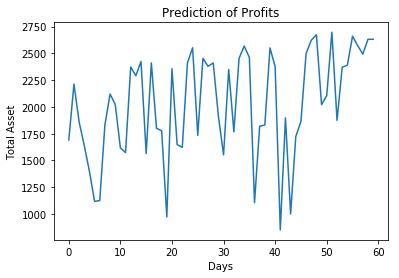

In [540]:
plt.plot(total_asset_list.values())
plt.ylabel('Total Asset')
plt.xlabel('Days')
plt.title('Prediction of Profits')
plt.show()

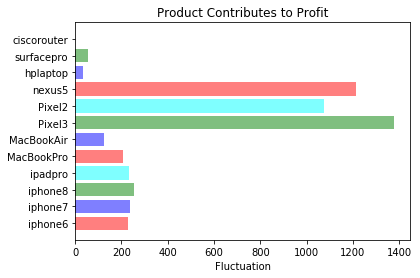

In [578]:
objects = price_change.keys()
y_pos = np.arange(len(objects))
performance = list()
for keys in price_change.keys():
    performance.append(price_change[keys])

plt.barh(y_pos, performance, align='center', alpha=0.5, color=['red','blue','green','cyan'])
plt.yticks(y_pos, objects)
plt.xlabel('Fluctuation')
plt.title('Product Contributes to Profit')

plt.show()

In [564]:
learning_list.keys()

dict_keys(['iphone6', 'iphone7', 'iphone8', 'ipadpro', 'MacBookPro', 'MacBookAir', 'Pixel3', 'Pixel2', 'nexus5', 'hplaptop', 'surfacepro', 'ciscorouter'])

In [565]:
temp_dict = learning_list['ipadpro']

In [570]:
def bar_chart(product, learning_list):
    height = list()
    bars = list()
    colors = list()
    for keys in learning_list[product].keys():
        bars.append(keys)
        action = get_action(learning_list[product][keys])
        height.append(abs(learning_list[product][keys][action]))
        if action:
            colors.append('green')
        else:
            colors.append('red')
    return height, bars, colors

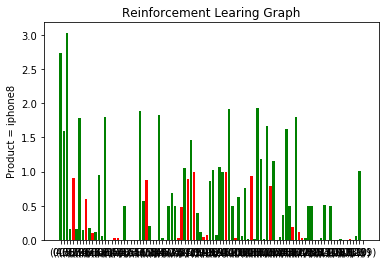

In [576]:
#height = [3, 12, 5, 18, 45]
#bars = ('A', 'B', 'C', 'D', 'E')
height, bars, colors = bar_chart('iphone8', learning_list)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=colors)
plt.xticks(y_pos, bars)
plt.ylabel('Product = iphone8')
plt.title('Reinforcement Learing Graph')
plt.show()



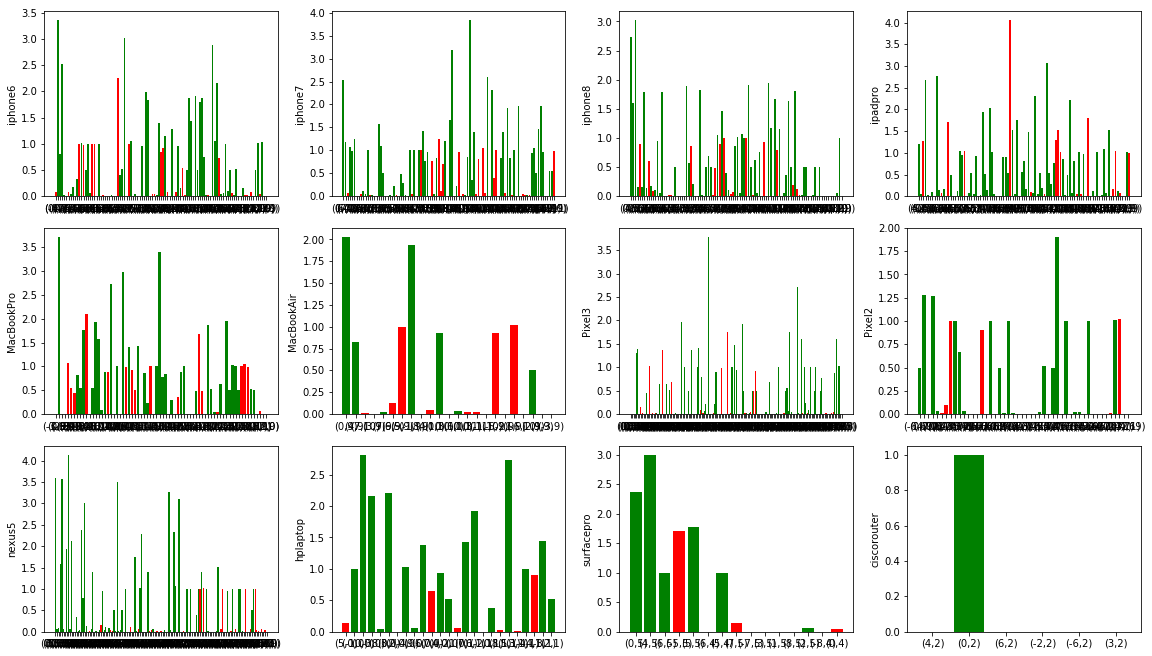

In [572]:
fig = plt.figure(figsize=(16,12))
plt.clf()
i = 0
for keys in learning_list.keys():
    plt.subplot(4, 4, i+1)
    height, bars, colors = bar_chart(keys, learning_list)
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height, color=colors)
    plt.xticks(y_pos, bars)
    
#    plt.bar(y_pos, height, color=colors)
#    plt.xticks(y_pos, bars)
    plt.ylabel(keys)
    i += 1
#    plt.show()    
fig.tight_layout()